<a href="https://colab.research.google.com/github/deekshaaj05/1RV23BT001---Bioinformatics-Lab/blob/main/1RV23BT001_Exp_4_Metagenomic_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


--- RAW TABLE WITH FIXED HEADER ---
                         Other  0.000504856  0.000356369  0.000386066  \
k__Archaea                                                              
k__Archaea    p__Euryarchaeota     0.110771     0.101862     0.086182   
k__Bacteria              Other     0.054881     0.054109     0.037894   
k__Bacteria   p__Acidobacteria     0.000802     0.000000     0.001633   
k__Bacteria  p__Actinobacteria     0.141567     0.143023     0.147655   
k__Bacteria    p__Atribacteria     0.000475     0.000327     0.000861   

             0.000267276  2.97E-05  0.000831527  0.000504856.1  0.000148487  \
k__Archaea                                                                    
k__Archaea      0.126927  0.014522     0.141746       0.113177     0.031509   
k__Bacteria     0.017165  0.044873     0.055386       0.033558     0.032519   
k__Bacteria     0.000119  0.000059     0.001247       0.000713     0.001455   
k__Bacteria     0.184094  0.201229     0.130401       0.

/tmp/ipython-input-2641658223.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=alpha_diversity.index, y=alpha_diversity.values, palette="viridis")
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


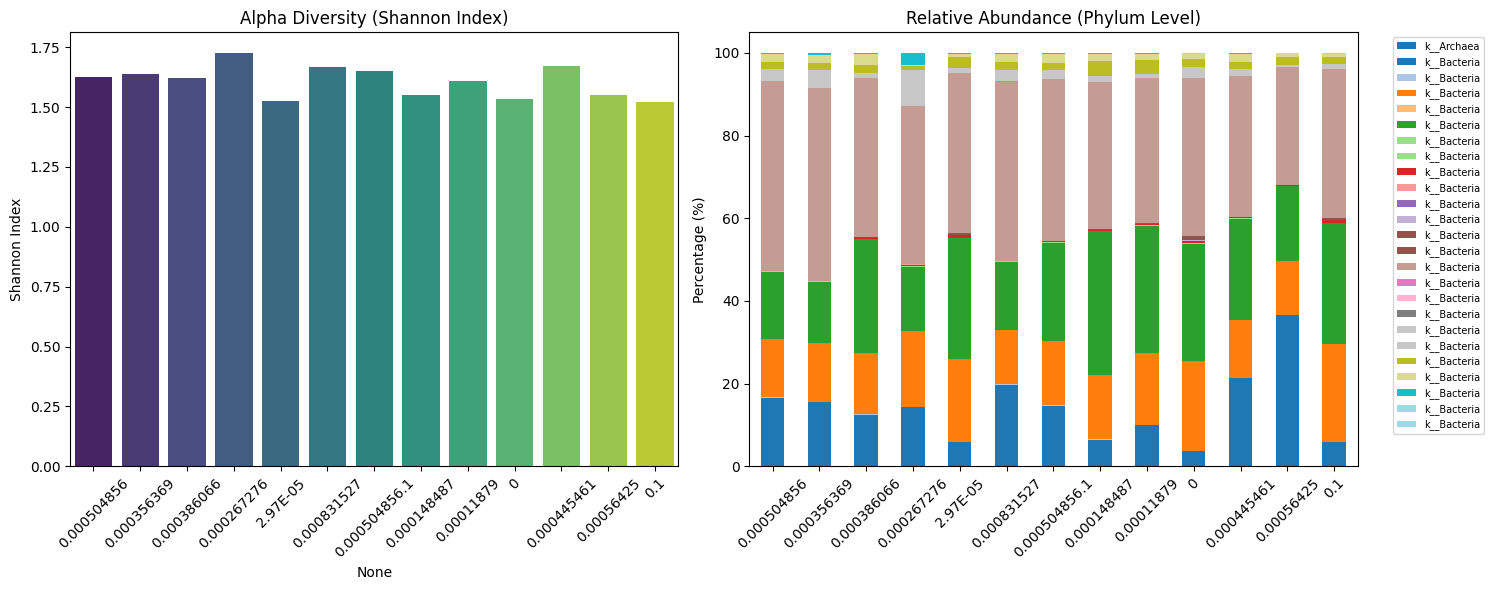

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------------
# 1. Load phylum-level OTU table
# ---------------------------------------------------------

file_path = "otu_table_Phylum.txt"   # <-- change this name

# Skip first metadata line; use second line as header
df = pd.read_csv(file_path, sep="\t", header=1, index_col=0)

print("\n--- RAW TABLE WITH FIXED HEADER ---")
print(df.head(), "\n")

# ---------------------------------------------------------
# 2. Keep only numeric columns (removes taxonomy / Other)
# ---------------------------------------------------------

df = df.select_dtypes(include=['float', 'int'])

# Remove taxa with all zero abundance
df = df.loc[df.sum(axis=1) > 0]

print("--- CLEANED PHYLUM TABLE ---")
print(df.head(), "\n")

# ---------------------------------------------------------
# 3. Alpha Diversity (Shannon Index)
# ---------------------------------------------------------

def calculate_shannon_index(counts):
    total = sum(counts)
    if total == 0:
        return 0
    p = counts / total
    p = p[p > 0]
    return -np.sum(p * np.log(p))

alpha_diversity = df.apply(calculate_shannon_index)

print("--- ALPHA DIVERSITY (Shannon) ---")
print(alpha_diversity, "\n")

# ---------------------------------------------------------
# 4. Relative Abundance (%)
# ---------------------------------------------------------

relative = df.div(df.sum(axis=0), axis=1) * 100

# ---------------------------------------------------------
# 5. PLOTS
# ---------------------------------------------------------

plt.figure(figsize=(15, 6))

# Shannon index bar plot
plt.subplot(1, 2, 1)
sns.barplot(x=alpha_diversity.index, y=alpha_diversity.values, palette="viridis")
plt.title("Alpha Diversity (Shannon Index)")
plt.ylabel("Shannon Index")
plt.xticks(rotation=45)

# Stacked barplot of Phylum-level Relative Abundance
plt.subplot(1, 2, 2)
relative.T.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='tab20')
plt.title("Relative Abundance (Phylum Level)")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=7)

plt.tight_layout()
plt.show()